In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

In [2]:
train = pd.read_csv('/Users/leonardodicaterina/Desktop/NovaIMS/MachineLearning/Machine_Learning_G19/Data/train_data.csv')
test = pd.read_csv('/Users/leonardodicaterina/Desktop/NovaIMS/MachineLearning/Machine_Learning_G19/Data/test_data.csv')

train.info()


/var/folders/n8/08b2nd114jdfnsydb_4mj4fw0000gn/T/ipykernel_73006/722739407.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('/Users/leonardodicaterina/Desktop/NovaIMS/MachineLearning/Machine_Learning_G19/Data/train_data.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

In [3]:
num_col = train.select_dtypes(include=np.number).columns

## Claim Identifier

In [4]:
num_col = num_col.drop('Claim Identifier')
PrimarKey = 'Claim Identifier'


good, there are no null values

In [5]:
x=train[PrimarKey].value_counts()
repeatedId = x[x>1] 
len(repeatedId) 

1

there is a repeated value

In [6]:
repetitions = train[train[PrimarKey] == repeatedId.index[0]]
repetitionsIndexes = repetitions.index

In [7]:
repetitions

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
257901,NaN,NaN,NaN,2021-05-21,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
526445,NaN,NaN,NaN,2022-09-05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
def compare_rows(df_):
    nulls = []
    differences = []
    for col in df_.columns:
        if df_[col].isnull().sum() == len(df_):
            nulls.append(col)
        if len(df_[col].value_counts()) == len(df_):
            differences.append(col)
    return nulls, differences

nulls, differences = compare_rows(repetitions)


In [9]:
repetitions[differences]

,Assembly Date
257901,2021-05-21
526445,2022-09-05


In [10]:
repetitions[nulls]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
257901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
526445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#delete rows with index sored in repetitionsIndexes
train.drop(repetitionsIndexes, inplace=True)


## Other Codes


In [12]:
# choose all the columns that have the name 'Code' in it
code_col = [col for col in train.columns if 'Code' in col]
code_col_desc = []
for col in code_col:
    n_ind = len(train[col].unique())
    n_nan = train[col].isnull().sum()
    perc_nan = n_nan/len(train[col])*100
    code_col_desc.append((col, n_ind, n_nan, perc_nan))

code_col_desc = pd.DataFrame(code_col_desc, columns=['Column', 'Unique Values', 'NaN Values', 'Percentage NaN'])
code_col_desc



,Column,Unique Values,NaN Values,Percentage NaN
0,Industry Code,25,29401,4.954092
1,Industry Code Description,21,29401,4.954092
2,WCIO Cause of Injury Code,78,35083,5.911513
3,WCIO Nature of Injury Code,57,35100,5.914378
4,WCIO Part Of Body Code,58,36525,6.154492
5,Zip Code,10061,48080,8.101518


In [13]:
code_col.append(PrimarKey)
for col in code_col:
    train[col] = train[col].astype('category')

this columns can be transformed in strings as they are categorical

In [14]:
#remove the code_clo form num_col
num_col = [col for col in num_col if col not in code_col]

In [15]:
num_col

['Age at Injury',
 'Average Weekly Wage',
 'Birth Year',
 'IME-4 Count',
 'OIICS Nature of Injury Description',
 'Agreement Reached',
 'Number of Dependents']

## Scalar values

## Age at Injury

In [16]:
ageAtInjury = train["Age at Injury"].value_counts().sort_index()
maxAge = train["Age at Injury"].max()
minAge = train["Age at Injury"].min()

In [17]:
#count nan values in ageAtInjury
count = train["Age at Injury"].isnull().sum()
print("Number of NaN values in Age at Injury: ", count,
      "\nover a total of ", len(train), "values",
      "\nwhich is equal to ", count/len(train)*100, "% of the total values")

Number of NaN values in Age at Injury:  19443 
over a total of  593469 values 
which is equal to  3.2761610126223943 % of the total values


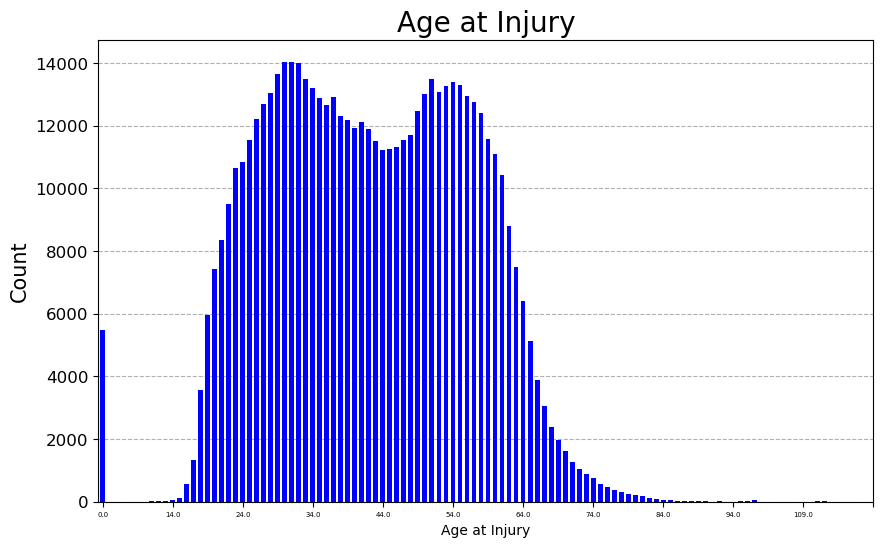

In [18]:
ageAtInjury.plot(kind='bar', figsize=(10, 6), color='blue', zorder=2, width=0.7)
plt.xticks(np.arange(minAge, maxAge, 10))
plt.title('Age at Injury', fontsize=20)
plt.xlabel('Age at Injury', fontsize=10)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=0, fontsize=5)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', zorder=1)




## Average Weekly wage

In [19]:
avgWeelyWage = train["Average Weekly Wage"].value_counts().sort_index()
maxWeeklyWage = train["Average Weekly Wage"].max()
minWeeklyWage = train["Average Weekly Wage"].min()

print("Number of NaN values in Average Weekly Wage: ", train["Average Weekly Wage"].isnull().sum(),
        "\nmax value: ", maxWeeklyWage,
        "\nmin value: ", minWeeklyWage)

Number of NaN values in Average Weekly Wage:  48094 
max value:  2828079.0 
min value:  0.0


the values are very high and computationally complex, lett's scale them down with a log

In [20]:
train["log Average Weekly Wage"] = np.log(train["Average Weekly Wage"]+1) # +1 to avoid log(0) as the minimum value is 0

<Axes: ylabel='Frequency'>

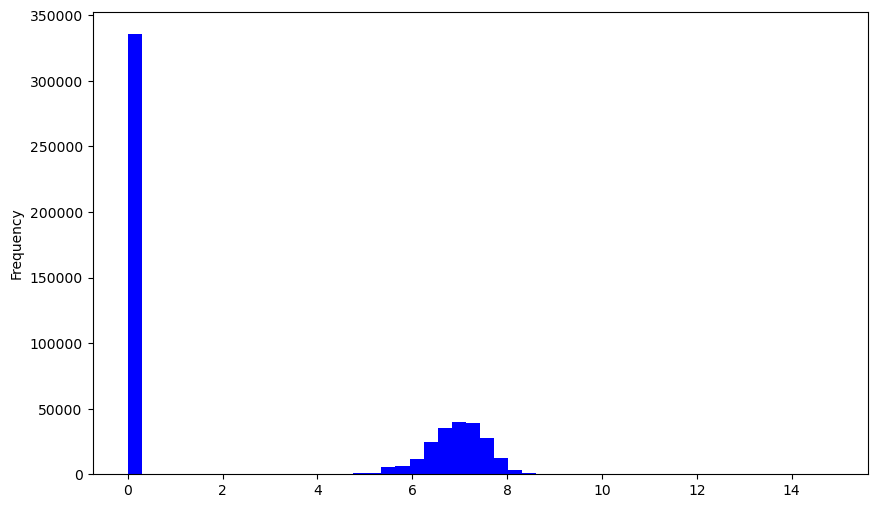

In [21]:
train["log Average Weekly Wage"].plot(kind='hist', figsize=(10, 6), color='blue', zorder=2, bins=50)

In [22]:
count = train["log Average Weekly Wage"].isnull().sum()
print("Number of NaN values in Average Weekly Wage: ", count,
      "over a total of ", len(train), "values",
      "which is equal to ", count/len(train)*100, "% of the total values")


Number of NaN values in Average Weekly Wage:  48094 over a total of  593469 values which is equal to  8.103877371859355 % of the total values


In [23]:
num_col.append("log Average Weekly Wage")
num_col.remove("Average Weekly Wage")

## IME-4 Count

In [24]:
IME4Max = train['IME-4 Count'].max()
IME4Min = train['IME-4 Count'].min()
IME4Mean = train['IME-4 Count'].mean()

print("Number of NaN values in IME-4 Count: ", train['IME-4 Count'].isnull().sum(),
        "\nmax value: ", IME4Max,
        "\nmin value: ", IME4Min,
        "\nmean value: ", IME4Mean)

Number of NaN values in IME-4 Count:  460666 
max value:  73.0 
min value:  1.0 
mean value:  3.20733718364796


In [25]:
float(train['IME-4 Count'].isnull().sum()/len(train['IME-4 Count'])*100)


77.62258854295675

77 percent of values are null, fishy probably they are related to something

In [26]:
train.dropcolumns = ['IME-4 Count']

/var/folders/n8/08b2nd114jdfnsydb_4mj4fw0000gn/T/ipykernel_73006/1907305221.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.dropcolumns = ['IME-4 Count']


In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593469 entries, 0 to 593470
Data columns (total 34 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   Accident Date                       570337 non-null  object  
 1   Age at Injury                       574026 non-null  float64 
 2   Alternative Dispute Resolution      574026 non-null  object  
 3   Assembly Date                       593469 non-null  object  
 4   Attorney/Representative             574026 non-null  object  
 5   Average Weekly Wage                 545375 non-null  float64 
 6   Birth Year                          544948 non-null  float64 
 7   C-2 Date                            559466 non-null  object  
 8   C-3 Date                            187245 non-null  object  
 9   Carrier Name                        574026 non-null  object  
 10  Carrier Type                        574026 non-null  object  
 11  Claim Identifier  

## OIICS Nature of Injury Description

In [28]:
train['OIICS Nature of Injury Description'].value_counts()
train['OIICS Nature of Injury Description'].isnull().sum()/len(train['OIICS Nature of Injury Description'])*100

np.float64(100.0)

the whole column is null

In [29]:
#remove IME-4 Count from the dataset train
train.drop(columns='OIICS Nature of Injury Description', inplace=True)

In [30]:
num_col = [col for col in num_col if col != 'OIICS Nature of Injury Description']

## Agreement Reached

In [31]:
uniqueAgrRea = train['Agreement Reached'].unique()
cuntnaAgreRea = train['Agreement Reached'].isnull().sum()
print("Number of NaN values in Agreement Reached: ", cuntnaAgreRea,
        "\nunique values: ", uniqueAgrRea)

print (cuntnaAgreRea/len(train['Agreement Reached']) *100, "percent of the values are NaN")

Number of NaN values in Agreement Reached:  19443 
unique values:  [ 0.  1. nan]
3.2761610126223943 percent of the values are NaN


this column can be transformed to boolean

In [32]:
train['Agreement Reached'] = train['Agreement Reached'].astype('bool')

## Number of Dependents

In [33]:
train['Number of Dependents'].describe()
train['Number of Dependents'].isnull().sum()/len(train['Number of Dependents'])*100

np.float64(3.2761610126223943)

## Year of birth

In [39]:
train['Birth Year'].describe() 
train[train['Birth Year'] == 0] = np.nan
train['Birth Year'] = train['Birth Year'].astype('Int64')

In [36]:
train['Age'] = 2024 - train['Birth Year']
num_col.append('Age')

# function to preprocess future data in this form

In [46]:
def standardize_numerical(df):
    # identify the primary key
    PrimarKey_df = 'Claim Identifier'
    # identify the numerical columns
    num_col_df = df.select_dtypes(include=np.number).columns
    # identify the categorical columns
    code_col_df = [col for col in df.columns if 'Code' in col]
    code_col_df.append(PrimarKey_df)
    num_col_df = [col for col in num_col_df if col not in code_col_df]
    # convert the categorical columns to category type
    for col in code_col_df:
        df[col] = df[col].astype('category')
    
    # check for repeated values in the primary key
    x=df[PrimarKey_df].value_counts()
    repeated_df_Id = x[x>1] 
    
    repetitions_df = []
    try:
        repetitions_df = df[df[PrimarKey_df] == repeated_df_Id.index[0]]
        size_rep = len(repetitions_df)

    except:
        size_rep = 0

    if size_rep > 0:
        print("There are repeated values in the dataset")
        print(repetitions_df)
    
    # log transformation of the Average Weekly Wage
    df["log Average Weekly Wage"] = np.log(df["Average Weekly Wage"]+1) # +1 to avoid log(0) as the minimum value is 0
    # question: should we look fo the claim identifier in te triaing datset to see if we already have it?
    
    #remove the IME-4 Count count form num_col_df
    try:
        df.drop(columns='IME-4 Count', inplace=True)
        df.drop(columns='OIICS Nature of Injury Description', inplace=True)
        num_col_df = [col for col in num_col_df if col != 'IME-4 Count']
        num_col_df = [col for col in num_col_df if col != 'OIICS Nature of Injury Description']
    except:
        print("IME-4 Count or OIICS Nature of Injury Description not found")
    
    # transform the 'Agreement Reached' column to boolean
    try:
        df['Agreement Reached'] = df['Agreement Reached'].astype('bool')
    except:
        print("Agreement Reached not found")
    
    num_col_df = [col for col in num_col_df if col != 'Agreement Reached']
    # standardize the 'Birth Year' column
    df[df['Birth Year'] == 0] = np.nan
    df['Birth Year'] = df['Birth Year'].astype('Int64')
    # create the 'Age' column
    df['Age'] = 2024 - df['Birth Year']
    num_col_df.append('Age')
    
    return df

    
    
    
    
x = standardize_numerical(test)
x.info()

IME-4 Count or OIICS Nature of Injury Description not found
Agreement Reached not found
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387975 entries, 0 to 387974
Data columns (total 30 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Accident Date                      366141 non-null  object  
 1   Age at Injury                      368379 non-null  float64 
 2   Alternative Dispute Resolution     368379 non-null  object  
 3   Assembly Date                      368379 non-null  object  
 4   Attorney/Representative            368379 non-null  object  
 5   Average Weekly Wage                350085 non-null  float64 
 6   Birth Year                         348909 non-null  Int64   
 7   C-2 Date                           359966 non-null  object  
 8   C-3 Date                           82270 non-null   object  
 9   Carrier Name                       368379 non-null  object  
 10  Carr